In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import yfinance as yf

In [42]:
tickers=pd.read_html("https://topforeignstocks.com/indices/components-of-the-sp-500-index/")[0]['Ticker']
tickers

0       AAPL
1       MSFT
2       AMZN
3       NVDA
4      GOOGL
       ...  
498      FOX
499     AXON
500     AXON
501      NWS
502     DISH
Name: Ticker, Length: 503, dtype: object

In [43]:
    val = input("Enter ticker name: ")
    print(val)
    end_date=datetime.now()
    start_date=datetime.now()-timedelta(days=15*365)
    history=yf.download(val,start=start_date,end=end_date,interval='1d')
    history

GOOGL
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-07-21,12.034034,12.114364,11.654154,11.731732,11.731732,235823940
2008-07-22,11.679680,12.018268,11.651652,11.939690,11.939690,187472340
2008-07-23,12.052302,12.443193,11.964464,12.242743,12.242743,195568236
2008-07-24,12.429930,12.434184,11.902402,11.902402,11.902402,141494364
2008-07-25,12.174424,12.340591,12.049550,12.311812,12.311812,127212660
...,...,...,...,...,...,...
2023-07-10,118.300003,118.309998,116.139999,116.449997,116.449997,35315200
2023-07-11,116.290001,117.709999,115.349998,117.139999,117.139999,23078800
2023-07-12,118.800003,120.330002,118.410004,118.930000,118.930000,30404400


In [44]:

    history=history.loc[:,['Open','Close','Volume']]
    history['prev_Close']=history.loc[:,'Close'].shift(1)
    history['prev_Volume']=history.loc[:,'Volume'].shift(1)
    datetimes=history.index.values
    weekdays=[]
    for dt in datetimes:
        dt=datetime.strptime(str(dt),'%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())
    history['Weekday']=weekdays
   
    history['200Mean']=history['prev_Close'].rolling(200).mean()
    history= history.replace(np.inf,np.nan).dropna()
    history

,Open,Close,Volume,prev_Close,prev_Volume,Weekday,200Mean
Date,,,,,,,
2009-05-06,10.179930,10.096847,105210684,10.084835,95935968.0,2,9.212958
2009-05-07,10.112613,9.925175,119872008,10.096847,105210684.0,3,9.204784
2009-05-08,10.081331,10.193443,154449396,9.925175,119872008.0,4,9.194711
2009-05-11,10.080080,10.209710,102269628,10.193443,154449396.0,0,9.184464
2009-05-12,10.260511,9.985235,151480368,10.209710,102269628.0,1,9.176001
...,...,...,...,...,...,...,...
2023-07-10,118.300003,116.449997,35315200,119.480003,21692600.0,0,102.204850
2023-07-11,116.290001,117.139999,23078800,116.449997,35315200.0,1,102.281400
2023-07-12,118.800003,118.930000,30404400,117.139999,23078800.0,2,102.370700


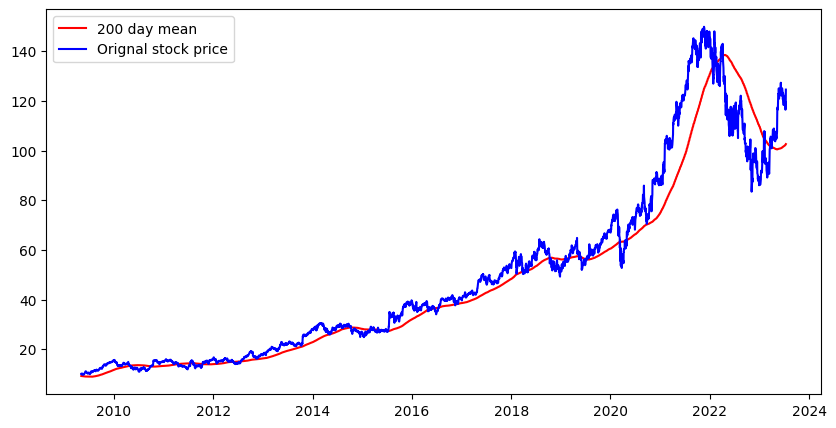

In [45]:
x=history.index.values
plt.figure(figsize=(10,5))
plt.plot(x,history['200Mean'],color='red')
plt.plot(x,history['prev_Close'],color='blue')
plt.legend(['200 day mean','Orignal stock price'])
plt.show()


In [46]:
from sklearn.linear_model import LinearRegression

Y=history['Close']
X=history.drop(['Close','Volume'],axis=1).values
num_test=365
X_Train=X[:-1*num_test]
Y_Train=Y[:-1*num_test]
X_Test=X[-1*num_test:]
Y_Test=Y[-1*num_test:]
model=LinearRegression()
model=model.fit(X_Train,Y_Train)
preds=model.predict(X_Test)


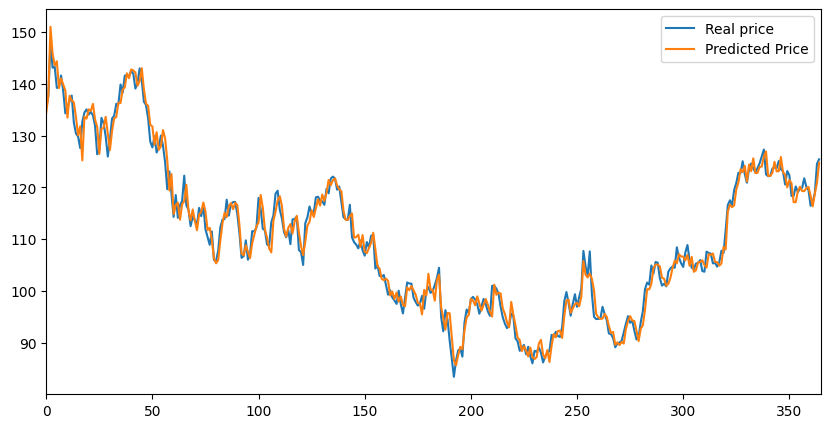

In [47]:
plt.figure(figsize=(10,5))
plt.plot((range(len(Y_Test))),Y_Test)
plt.plot((range(len(preds))),preds)
plt.xlim(0,365)
plt.legend(['Real price','Predicted Price'])
plt.show()

In [48]:
val

'GOOGL'

In [49]:
history

,Open,Close,Volume,prev_Close,prev_Volume,Weekday,200Mean
Date,,,,,,,
2009-05-06,10.179930,10.096847,105210684,10.084835,95935968.0,2,9.212958
2009-05-07,10.112613,9.925175,119872008,10.096847,105210684.0,3,9.204784
2009-05-08,10.081331,10.193443,154449396,9.925175,119872008.0,4,9.194711
2009-05-11,10.080080,10.209710,102269628,10.193443,154449396.0,0,9.184464
2009-05-12,10.260511,9.985235,151480368,10.209710,102269628.0,1,9.176001
...,...,...,...,...,...,...,...
2023-07-10,118.300003,116.449997,35315200,119.480003,21692600.0,0,102.204850
2023-07-11,116.290001,117.139999,23078800,116.449997,35315200.0,1,102.281400
2023-07-12,118.800003,118.930000,30404400,117.139999,23078800.0,2,102.370700


In [50]:
p=round(preds[-1])
print("Predicted Price is:",(p))

Predicted Price is: 125
